# Importing Necessary Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset 

In [62]:
df = pd.read_fwf("C:\\Users\\Revanth\\Desktop\\brain_body.txt")

In [63]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


# Data Cleaning

In [64]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [65]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [66]:
IQR = df["Brain"].quantile(0.75) - df["Brain"].quantile(0.25)
Upper_limit = df["Brain"].quantile(0.75) + (1.5 * IQR)
Lower_limit = df["Brain"].quantile(0.75) - (1.5 * IQR)
Upper_limit, Lower_limit

(119.60625, -23.20125)

In [67]:
df.Brain.clip(Lower_limit, Upper_limit, inplace=True)

In [68]:
IQR = df["Body"].quantile(0.75) - df["Body"].quantile(0.25)
Upper_Limit = df["Body"].quantile(0.75) + (1.5 * IQR)
Lower_Limit = df["Body"].quantile(0.75) - (1.5 * IQR)
Upper_Limit, Lower_Limit

(408.625, -76.625)

In [69]:
df.Body.clip(Lower_Limit, Upper_Limit, inplace=True)

In [70]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


In [71]:
df.drop_duplicates()
df.shape

(62, 2)

In [72]:
df.dtypes

Brain    float64
Body     float64
dtype: object

# Exploratory Data Analysis

<AxesSubplot: xlabel='Brain', ylabel='Body'>

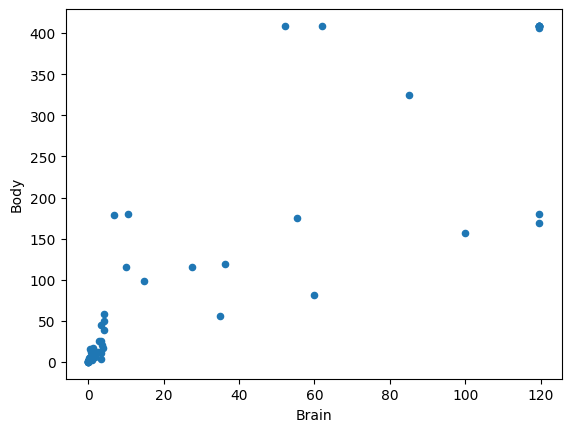

In [73]:
df.plot("Brain", "Body", kind="scatter")

In [74]:
df.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


# Splitting of Dataset

In [75]:
from sklearn.model_selection import train_test_split
x = df.loc[:,["Brain"]].values
y = df.loc[:,"Body"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# Model

In [76]:
from sklearn.linear_model import LinearRegression
cursor = LinearRegression()

In [77]:
cursor.fit(x_train,y_train)

LinearRegression()

In [78]:
cursor.coef_

array([2.91333947])

In [79]:
cursor.intercept_

21.284688729370103

## 1. Find the linear regression equation for this data for brain weight to body weight. 

In [80]:
# y(Body_Weight) = (2.99 * Brain_Weight) + 15.93

# Actual vs Predicted

In [81]:
y_pred = cursor.predict(x_test)

In [82]:
df_bb = pd.DataFrame({"Actual" :y_test, "Predicted" :y_pred})
df_bb

,Actual,Predicted
0,1.200,21.503189
1,4.000,21.578936
2,3.500,23.571660
3,56.000,123.251570
4,157.000,312.618636
5,408.625,369.738298
6,179.500,52.020420
7,25.000,30.024707
8,408.625,369.738298
9,25.600,30.898709


## 2. Chart the original data and the equation on the chart.

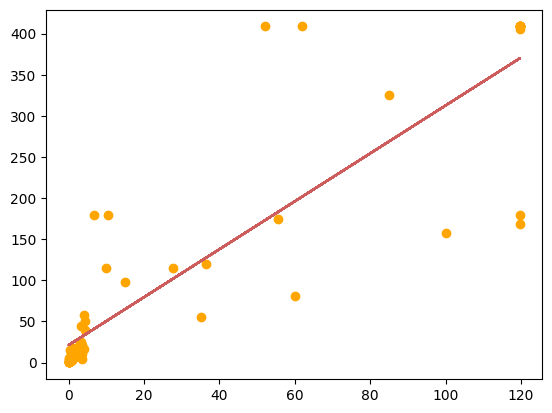

In [83]:
plt.scatter(x,y, color="orange")
plt.plot(x, cursor.predict(x), color="#CD5C5C")

# Evaluation Metrics : R2-Score

In [84]:
from sklearn import metrics
s = cursor.score(x_test, y_test)

## 3. Find the equation's  R2  score (use the .score method) 

In [85]:
print("The R-score of this model is", s )

The R-score of this model is 0.8569214861167207
